For this task, the dataset is collected from Kaggle, https://www.kaggle.com/uciml/breast-cancer-wisconsin-data. It is a dataset of breast cancer patients with both malignant and benign tumors. The K-nearest neighbour technique is used to determine if a patient has cancer (malignant tumor) or not (benign tumor).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#reading dataset
df = pd.read_csv("/content/drive/MyDrive/Machine_learning_projects/Breast_Cancer_Wisconsin_Diagnosis/data.csv")
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
#converting the diagnosis column from categorical to numerical
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [6]:
#separating the features set and target column
X = df.iloc[:, 1:]
y = df.iloc[:, :1] #or df['diagnosis']

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#visualizing the data
#sns.scatterplot(df, x=df['radius_mean'], y=df['fractal_dimension_mean'], hue=df['diagnosis'])

In [7]:
#initializing the knn classifier
knn_model = KNeighborsClassifier(13)

#training the classifier
model = knn_model.fit(X_train, y_train)

#testing the model
preds = model.predict(X_test)
print(preds)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
#predicting the accuracy
knn_model.score(X_test, y_test)*100

96.27659574468085

In [31]:
#Performing Cross Validation
k_value = [i for i in range(1, 51, 2)]
scores = []

for k in k_value:
  knn_model = KNeighborsClassifier(n_neighbors = k)
  score = cross_val_score(knn_model, X_train, y_train.values.ravel(), cv=10, scoring="accuracy")
  scores.append(score.mean())
print(scores)

[0.8948043184885289, 0.9027665317139002, 0.9080296896086371, 0.9079622132253711, 0.9000674763832659, 0.9053306342780028, 0.9105937921727396, 0.9053306342780028, 0.9026990553306342, 0.9026990553306342, 0.9053306342780028, 0.9053306342780028, 0.9026990553306342, 0.9027665317139002, 0.9026990553306342, 0.9026990553306342, 0.9026990553306342, 0.9026990553306342, 0.9026990553306342, 0.8975033738191632, 0.9002024291497976, 0.8949392712550608, 0.8923076923076924, 0.8896761133603238, 0.8923076923076924]


Text(0, 0.5, 'Accuracy Score')

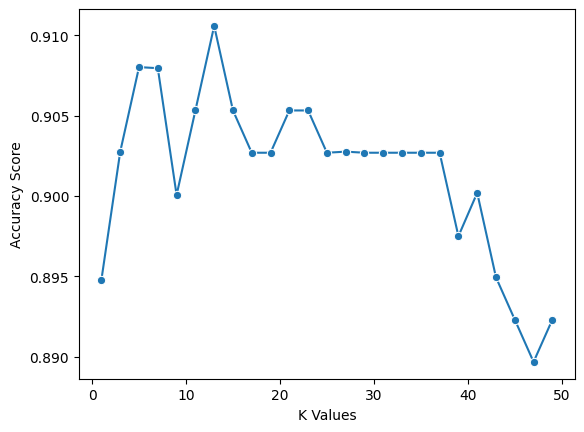

In [30]:
sns.lineplot(x = k_value, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

We can see from our chart that k = 13 have an accuracy score of 91% and is the only value with highest accuracy.

The optimal number of neighbors is  13 


Text(0, 0.5, 'Misclassification Error')

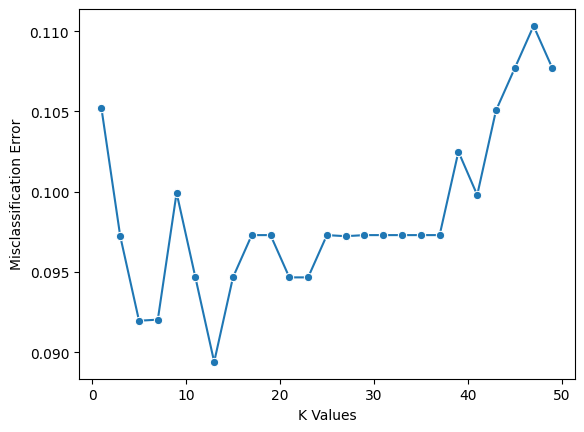

In [39]:
#Alternate way to find optimal k value, Misclassification error versus k
MSE = [1-x for x in scores]

# determining the best k
optimal_k = k_value[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
sns.lineplot(x = k_value, y = MSE, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Misclassification Error")

Here we can see that when k=13, the misclassification error is minimum and thus it is the optimal k value.